# Project : Influence of Ingredients on Ice Cream Flavors and Ratings

## Load Data and Check Data

In [1]:
import pandas as pd

df = pd.read_csv('products.csv')

In [2]:
df.head()

,key,icecream_name,description,rating,rating_count,ingredients,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0_hd,White Chocolate Raspberry Truffle Ice Cream,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
1,1_hd,Banana Peanut Butter Chip Ice Cream,Ribbons of rich peanut butter and bits of choc...,4.7,80,"CREAM, SKIM MILK, SUGAR, PEANUTS, BANANA PUREE...",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2_hd,Bourbon Praline Pecan Ice Cream,Treat yourself to ice cream infused with smoot...,4.1,191,"CREAM, SKIM MILK, SUGAR, BROWN SUGAR, EGG YOLK...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3_hd,Bourbon Vanilla Bean Truffle Ice Cream,"A classic pairing made even better, enjoy crea...",4.0,89,"CREAM, SKIM MILK, SUGAR, HONEY, EGG YOLKS, BRO...",0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,4_hd,Butter Pecan Ice Cream,"An American classic, revisited with our passio...",4.3,111,"CREAM, SKIM MILK, SUGAR, PECANS, LACTOSE REDUC...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Data Wrangling

In [4]:
# Create a set of unique words extracted from 'ingredients' across all rows
unique_words = set()
for ingredients in df['ingredients']:
    unique_words.update(ingredients.split(', '))

# Create a function to generate dummy columns for a DataFrame
def create_dummy_columns(df):
    for word in unique_words:
        df[word] = df['ingredients'].apply(lambda ingredients: int(word in ingredients))
    return df

# Apply the create_dummy_columns function to create dummy columns for all rows
df = create_dummy_columns(df)

df.to_csv('products.csv', index=False)
# Display the DataFrame with the added dummy columns
df.head()

,key,icecream_name,description,rating,rating_count,ingredients,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0_hd,White Chocolate Raspberry Truffle Ice Cream,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
1,1_hd,Banana Peanut Butter Chip Ice Cream,Ribbons of rich peanut butter and bits of choc...,4.7,80,"CREAM, SKIM MILK, SUGAR, PEANUTS, BANANA PUREE...",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2_hd,Bourbon Praline Pecan Ice Cream,Treat yourself to ice cream infused with smoot...,4.1,191,"CREAM, SKIM MILK, SUGAR, BROWN SUGAR, EGG YOLK...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3_hd,Bourbon Vanilla Bean Truffle Ice Cream,"A classic pairing made even better, enjoy crea...",4.0,89,"CREAM, SKIM MILK, SUGAR, HONEY, EGG YOLKS, BRO...",0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,4_hd,Butter Pecan Ice Cream,"An American classic, revisited with our passio...",4.3,111,"CREAM, SKIM MILK, SUGAR, PECANS, LACTOSE REDUC...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Creating Model : Use K-Nearest Neighbor  

In [5]:
import warnings

# Filter out the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Find Elbow Method

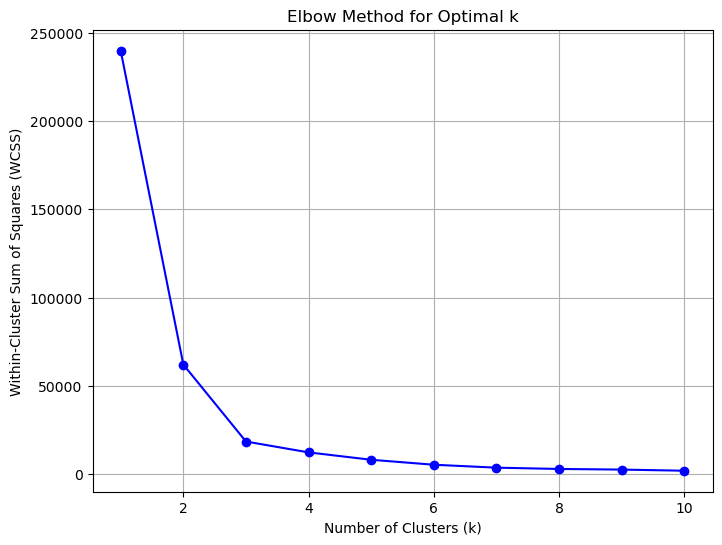

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('products.csv')

# Select only numeric columns for clustering (if needed)
numeric_columns = df.select_dtypes(include=['number'])

# Initialize a list to store the WCSS values for different k values
wcss = []

# Define a range of k values to test
k_values = range(1, 11)  # You can adjust the range as needed

# Fit K-Means for each k value and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(numeric_columns)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

## Evaluated Method Using Silhouette_score

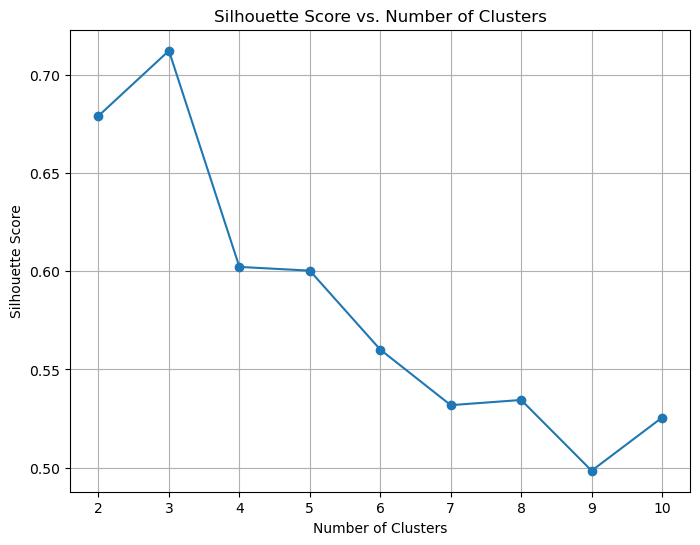

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('products.csv')

X = df.select_dtypes(include=['number']) 

num_clusters_range = range(2, 11)  
silhouette_scores = []

for num_clusters in num_clusters_range:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)

    # Get cluster labels for each data point
    cluster_labels = kmeans.labels_

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#Higher Silhouette Scores indicate better clustering

## Clstering Group 

In [43]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Define the number of clusters (k)
num_clusters = 3  # You can adjust the number of clusters

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(numeric_columns)

# Add a new column to your DataFrame to store the cluster labels
df['ingredient_cluster'] = kmeans.labels_

df.to_csv('products.csv', index=False)
# Display the DataFrame with the added dummy columns
df.head()



,key,icecream_name,description,rating,rating_count,ingredients,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0_hd,White Chocolate Raspberry Truffle Ice Cream,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
1,1_hd,Banana Peanut Butter Chip Ice Cream,Ribbons of rich peanut butter and bits of choc...,4.7,80,"CREAM, SKIM MILK, SUGAR, PEANUTS, BANANA PUREE...",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2_hd,Bourbon Praline Pecan Ice Cream,Treat yourself to ice cream infused with smoot...,4.1,191,"CREAM, SKIM MILK, SUGAR, BROWN SUGAR, EGG YOLK...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3_hd,Bourbon Vanilla Bean Truffle Ice Cream,"A classic pairing made even better, enjoy crea...",4.0,89,"CREAM, SKIM MILK, SUGAR, HONEY, EGG YOLKS, BRO...",0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,4_hd,Butter Pecan Ice Cream,"An American classic, revisited with our passio...",4.3,111,"CREAM, SKIM MILK, SUGAR, PECANS, LACTOSE REDUC...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Cluster Counts

In [44]:
cluster_counts = df['ingredient_cluster'].value_counts()
print(cluster_counts)

1    43
0    18
2     9
Name: ingredient_cluster, dtype: int64


## Use scatterplot to display relationship

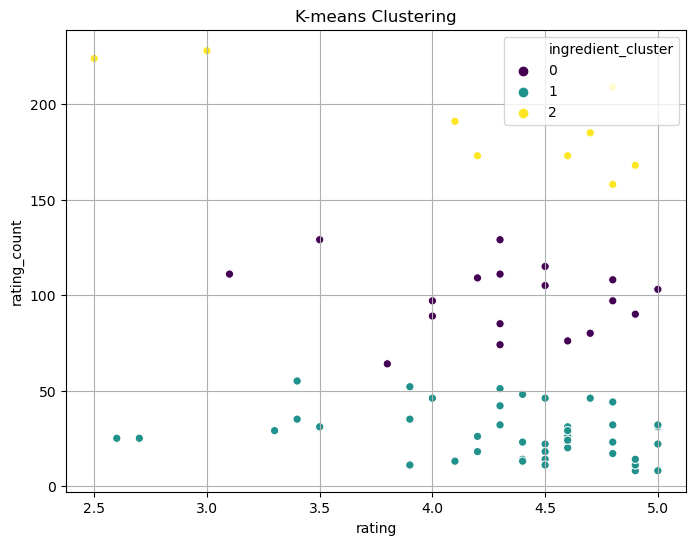

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('products.csv')

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Define the number of clusters (k)
num_clusters = 3  # You can adjust the number of clusters

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(numeric_columns)

# Add a new column to your DataFrame to store the cluster labels
df['ingredient_cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='rating_count', hue='ingredient_cluster', palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('rating')
plt.ylabel('rating_count')
plt.grid(True)
plt.show()

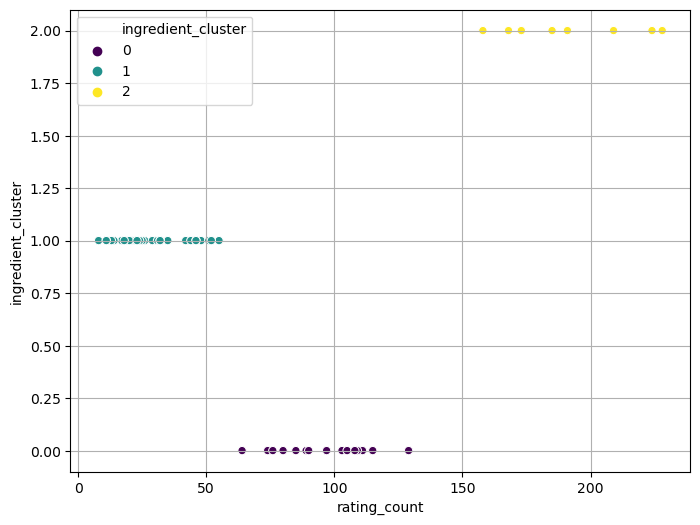

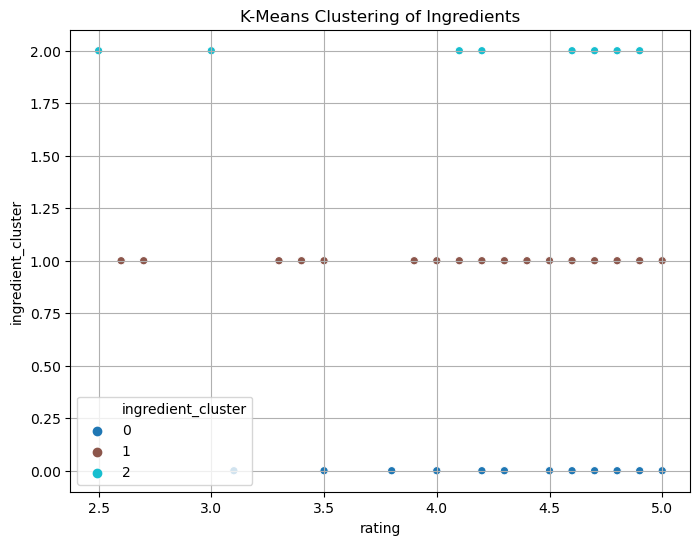

In [46]:
df = pd.read_csv('products.csv')

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Define the number of clusters (k)
num_clusters = 3  # You can adjust the number of clusters

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(numeric_columns)

# Add a new column to DataFrame to store the cluster labels
df['ingredient_cluster'] = kmeans.labels_

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating_count', y='ingredient_cluster', hue='ingredient_cluster', palette='viridis')
plt.grid(True)

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='ingredient_cluster', hue='ingredient_cluster', palette='tab10')
plt.xlabel('rating')
plt.ylabel('ingredient_cluster')
plt.title('K-Means Clustering of Ingredients')
plt.grid(True)
plt.show()

In [48]:
cluster_2_df = df[df['ingredient_cluster'] == 2]
cluster_2_df

,key,icecream_name,description,rating,rating_count,ingredients,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0_hd,White Chocolate Raspberry Truffle Ice Cream,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
2,2_hd,Bourbon Praline Pecan Ice Cream,Treat yourself to ice cream infused with smoot...,4.1,191,"CREAM, SKIM MILK, SUGAR, BROWN SUGAR, EGG YOLK...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
6,6_hd,Caramel Cone Ice Cream,We balance a creamy blend of caramel ice cream...,4.7,185,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, SWEETENED ...",0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
15,15_hd,Chocolate Peanut Butter Ice Cream,We start with our legendary chocolate ice crea...,4.2,173,"CREAM, SKIM MILK, CANE SUGAR, PEANUTS, EGG YOL...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
21,21_hd,Coffee Ice Cream,We roast the finest Brazilian coffee beans and...,4.6,173,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, COFFEE",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
27,27_hd,Double Belgian Chocolate Chip Ice Cream,"Your favorite Belgian chocolate ice cream, ren...",4.8,158,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, DARK CH...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
29,29_hd,Dulce de Leche Ice Cream,"Inspired by Latin America's treasured dessert,...",4.8,209,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
59,59_hd,Vanilla Ice Cream,Vanilla is the essence of elegance and sophist...,3.0,228,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, VANIL...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
66,66_hd,Vanilla Milk Chocolate Almond Ice Cream Bar,"We start with pure, sweet vanilla and blend it...",2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


## Find rating and rating_Count treashold to determine which group of cluster has most influence on rating   

Text(0.5, 0, 'Rating Count')

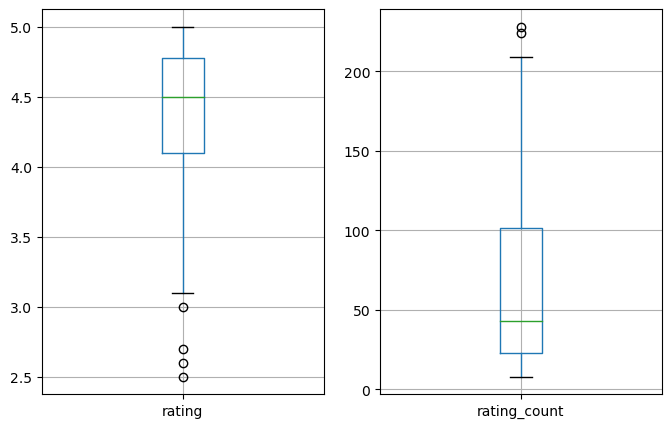

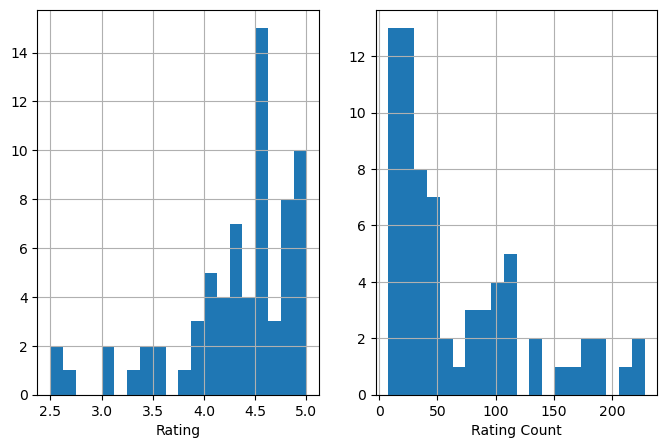

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('products.csv')  

# Summary statistics
rating_mean = df['rating'].mean()
rating_count_mean = df['rating_count'].mean()

# Box plots
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
df.boxplot('rating')
plt.subplot(1, 2, 2)
df.boxplot('rating_count')

# Percentiles
rating_percentile_75 = df['rating'].quantile(0.75)
rating_count_percentile_75 = df['rating_count'].quantile(0.75)

# Z-scores
rating_z_scores = (df['rating'] - rating_mean) / df['rating'].std()
rating_count_z_scores = (df['rating_count'] - rating_count_mean) / df['rating_count'].std()

# Visualizations
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
df['rating'].hist(bins=20)
plt.xlabel('Rating')
plt.subplot(1, 2, 2)
df['rating_count'].hist(bins=20)
plt.xlabel('Rating Count')


In [49]:
# Output results
print("Rating Mean:", rating_mean)
print("Rating Count Mean:", rating_count_mean)
print("75th Percentile Rating:", rating_percentile_75)
print("75th Percentile Rating Count:", rating_count_percentile_75)
print('rating_z_scores:',rating_z_scores)
print('rating_count_z_scores:', rating_count_z_scores)

Rating Mean: 4.307142857142858
Rating Count Mean: 66.52857142857142
75th Percentile Rating: 4.775
75th Percentile Rating Count: 101.5
rating_z_scores: 0     0.992774
1     0.657862
2    -0.346873
3    -0.514329
4    -0.011961
        ...   
65    0.490406
66   -3.026166
67   -0.011961
68    0.322951
69   -0.681784
Name: rating, Length: 70, dtype: float64
rating_count_z_scores: 0     1.723531
1     0.228817
2     2.114195
3     0.381686
4     0.755364
        ...   
65    0.160876
66    2.674712
67    1.061101
68   -0.943174
69   -0.943174
Name: rating_count, Length: 70, dtype: float64


## Result of selected clusters that has most influence on rating 

In [9]:

# Define a dictionary to map cluster names to numeric values
cluster_names = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2"}

# Define the rating and rating_count criteria
rating_threshold = 4.7
rating_count_threshold = 101.5

# Filter the DataFrame to select rows with rating > 4.5 and rating_count >= 150
filtered_rows = df[(df['rating'] > rating_threshold) & (df['rating_count'] >= rating_count_threshold)]
filtered_rows


,key,icecream_name,description,rating,rating_count,ingredients,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0_hd,White Chocolate Raspberry Truffle Ice Cream,A truly exquisite ice cream inspired by fine c...,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT...",0,0,0,1,...,0,0,0,0,0,0,0,0,1,2
27,27_hd,Double Belgian Chocolate Chip Ice Cream,"Your favorite Belgian chocolate ice cream, ren...",4.8,158,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, DARK CH...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
29,29_hd,Dulce de Leche Ice Cream,"Inspired by Latin America's treasured dessert,...",4.8,209,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
31,31_hd,Honey Salted Caramel Almond Ice Cream,"This decadent blend of honey ice cream, swirls...",5.0,103,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M...",0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
55,55_hd,Strawberry Ice Cream,We introduce sweet summer strawberries to pure...,4.8,108,"CREAM, SKIM MILK, STRAWBERRIES, CANE SUGAR, EG...",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import pandas as pd
from sklearn.cluster import KMeans

# Step 1: Filter the DataFrame to select rows with rating > 4.7 and rating_count >= 101.5
rating_threshold = 4.7
rating_count_threshold = 101.5
filtered_rows = df[(df['rating'] > rating_threshold) & (df['rating_count'] >= rating_count_threshold)].copy()

# Step 2: Select the columns starting from the 7th column
selected_columns = df.columns[6:]  # Assumes that column indexing starts at 0

# Step 3: Perform K-Means clustering on the selected columns
n_clusters = 3  # Choose the number of clusters as needed
X = filtered_rows[selected_columns]

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_rows['cluster'] = kmeans.fit_predict(X)


In [19]:
# Step 4: Analyze Cluster Characteristics (Cluster Centers)
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to a DataFrame for easier analysis
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_columns)
cluster_centers_df


# You can compare the values in the cluster centers to understand feature differences between clusters.


,PUMPKIN JUICE CONCENTRATE,COCONUT EXTRACT,BUTTER OIL,EGG YOLKS,EGGS,PALM KERNEL OIL,CITRIC ACID,SOY LECITHIN),BUTTER,BUTTERFAT,...,TOFFEE,MILK CHOCOLATE AND VEGETABLE OIL COATING,VANILLA ICE CREAM: CREAM,HONEY,VEGETABLE JUICE CONCENTRATE COLOR.\nCONTAINS: MILK,WHITE CHOCOLATE ICE CREAM: CREAM,SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR,PECTIN. CARAMEL SWIRL: BROWN SUGAR,RASPBERRY PUREE,ingredient_cluster
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,-2.775558e-17,0.666667
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,2.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000e+00,2.000000


# Find 20 importance features from 5 highest scores base on Rating and Ingredients

In [26]:
#  Analyze Cluster Characteristics (Cluster Centers)
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to a DataFrame for easier analysis
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_columns)

# Calculate the mean absolute value for each feature across clusters
feature_importance = cluster_centers_df.abs().mean()

# Exclude the 'ingredient_cluster' column from the list
feature_importance = feature_importance.drop('ingredient_cluster')

# Sort features by their importance
top_20_features = feature_importance.nlargest(20)
top_20_features



EGG YOLKS                      1.000000
MILK                           1.000000
CREAM                          1.000000
SKIM MILK                      1.000000
EGG                            1.000000
SUGAR                          1.000000
VANILLA EXTRACT                0.888889
BUTTER                         0.777778
COCONUT OIL                    0.777778
COCOA BUTTER                   0.666667
COCOA PROCESSED WITH ALKALI    0.666667
COCOA                          0.666667
NATURAL FLAVOR                 0.666667
PECTIN                         0.555556
CORN SYRUP                     0.555556
SALT                           0.555556
SOY LECITHIN                   0.444444
LACTOSE REDUCED SKIM MILK      0.333333
COTTONSEED OIL                 0.333333
CHOCOLATE                      0.333333
dtype: float64

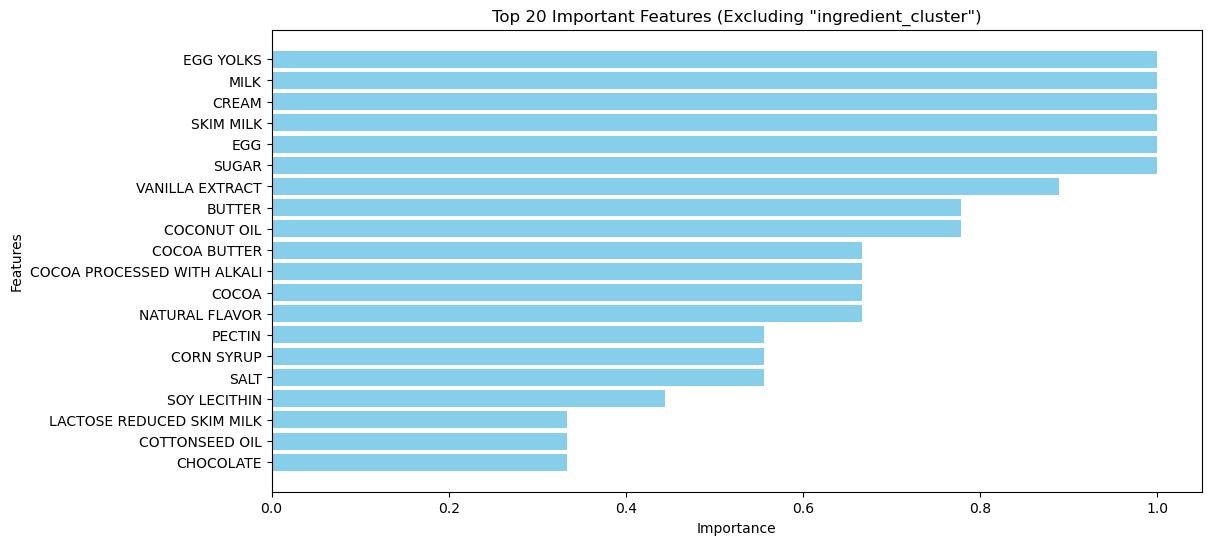

In [24]:
import matplotlib.pyplot as plt

# Sort features by their importance
top_20_features = feature_importance.nlargest(20)

# Create a bar plot to visualize the top 20 important features
plt.figure(figsize=(12, 6))
plt.barh(top_20_features.index, top_20_features.values, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features (Excluding "ingredient_cluster")')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


# Find percentage of 20 importance features from 5 most highest score base on Rating and Ingredients

In [29]:
total_importance = top_20_features.sum()

# Calculate the percentage of importance for each feature
percentage_importance = (top_20_features / total_importance) * 100
percentage_importance

EGG YOLKS                      7.03125
MILK                           7.03125
CREAM                          7.03125
SKIM MILK                      7.03125
EGG                            7.03125
SUGAR                          7.03125
VANILLA EXTRACT                6.25000
BUTTER                         5.46875
COCONUT OIL                    5.46875
COCOA BUTTER                   4.68750
COCOA PROCESSED WITH ALKALI    4.68750
COCOA                          4.68750
NATURAL FLAVOR                 4.68750
PECTIN                         3.90625
CORN SYRUP                     3.90625
SALT                           3.90625
SOY LECITHIN                   3.12500
LACTOSE REDUCED SKIM MILK      2.34375
COTTONSEED OIL                 2.34375
CHOCOLATE                      2.34375
dtype: float64

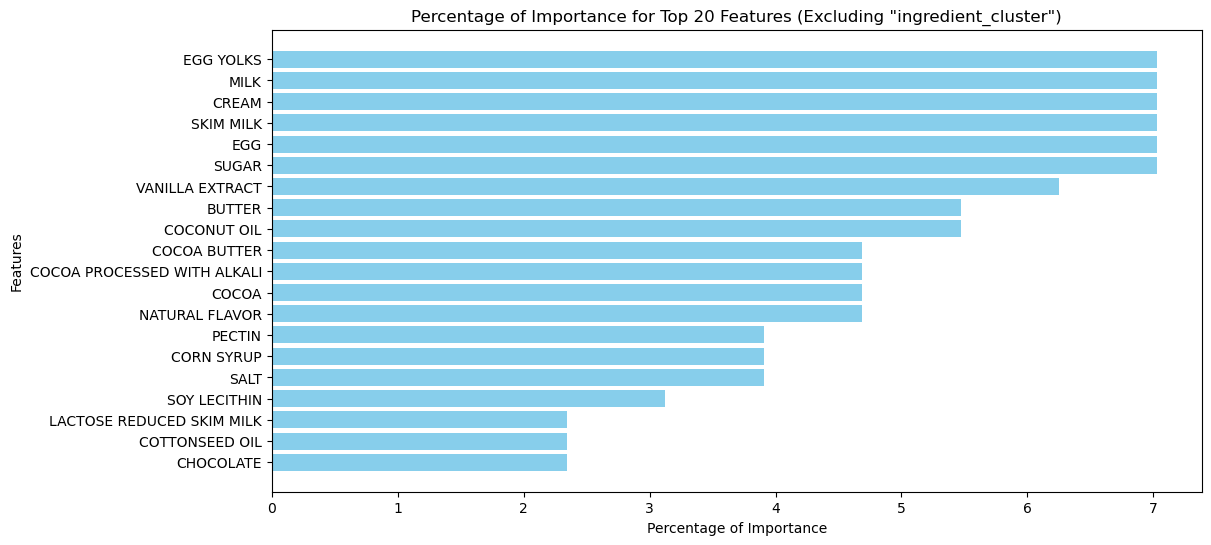

In [30]:
total_importance = top_20_features.sum()
percentage_importance = (top_20_features / total_importance) * 100
plt.figure(figsize=(12, 6))
plt.barh(percentage_importance.index, percentage_importance.values, color='skyblue')
plt.xlabel('Percentage of Importance')
plt.ylabel('Features')
plt.title('Percentage of Importance for Top 20 Features (Excluding "ingredient_cluster")')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


# We can estimate that ratingcount  probalby based on qulaity of egg yolks

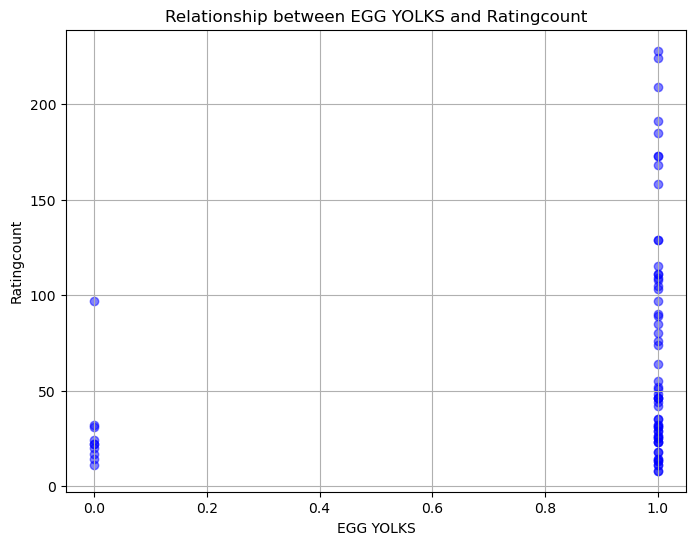

In [40]:
import matplotlib.pyplot as plt

# Extract the 'EGG YOLKS' and 'Rating' columns
egg_yolks = df['EGG YOLKS']
ratingcount = df['rating_count']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(egg_yolks, ratingcount, alpha=0.5, color='blue')
plt.title('Relationship between EGG YOLKS and Ratingcount')
plt.xlabel('EGG YOLKS')
plt.ylabel('Ratingcount')
plt.grid(True)

plt.show()


In [17]:

# Set the maximum column width to unlimited
pd.set_option('display.max_colwidth', None)

description_df = filtered_rows[['icecream_name','rating','rating_count','description','ingredient_cluster']]
description_df

,icecream_name,rating,rating_count,description,ingredient_cluster
0,White Chocolate Raspberry Truffle Ice Cream,4.9,168,A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream and swirl in satisfying chunks of chocolaty fudge truffles and a tangy raspberry ribbon.,2
27,Double Belgian Chocolate Chip Ice Cream,4.8,158,"Your favorite Belgian chocolate ice cream, renamed. Our Belgian chocolate combines rich, velvety chocolate ice cream with finely shaved Belgian chocolate for a uniquely textured experience.",2
29,Dulce de Leche Ice Cream,4.8,209,"Inspired by Latin America's treasured dessert, our dulce de leche ice cream is a delicious combination of caramel and sweet cream, swirled with ribbons of golden caramel.",2
31,Honey Salted Caramel Almond Ice Cream,5.0,103,"This decadent blend of honey ice cream, swirls of salted caramel, and crunchy toasted almonds was lovingly crafted to raise awareness for the honeybees and other pollinators who bring us so many of our favorite ingredients.",0
55,Strawberry Ice Cream,4.8,108,"We introduce sweet summer strawberries to pure cream and other natural ingredients. Because it's brimming with real fruit, the true flavor of our strawberries comes shining through.",0


## Data Visualization to Interpret the Results of Ice Cream Names and Their Ingredients' Influence on Ratings and Rating Counts

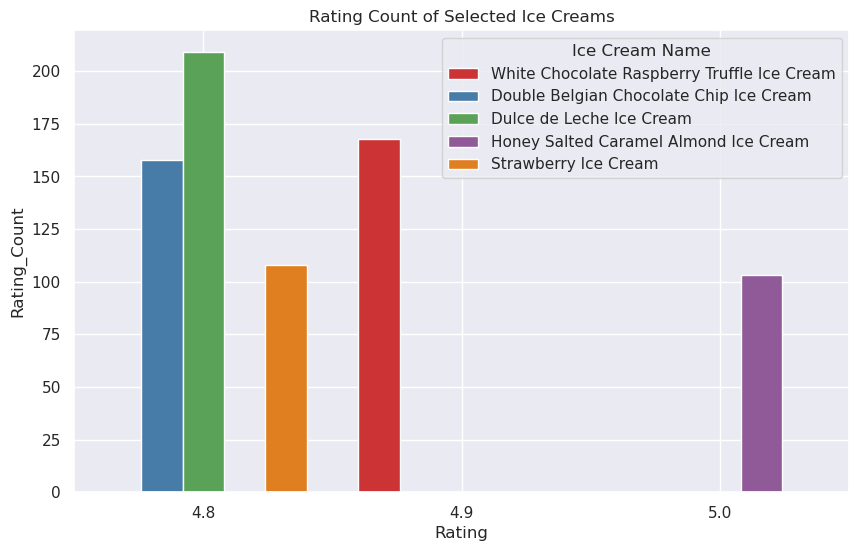

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_rows, x='rating', y='rating_count', hue='icecream_name', palette='Set1')
plt.xlabel('Rating')
plt.ylabel('Rating_Count')
plt.title('Rating Count of Selected Ice Creams')
plt.legend(title='Ice Cream Name', loc='upper right')
plt.grid(True)
plt.show()



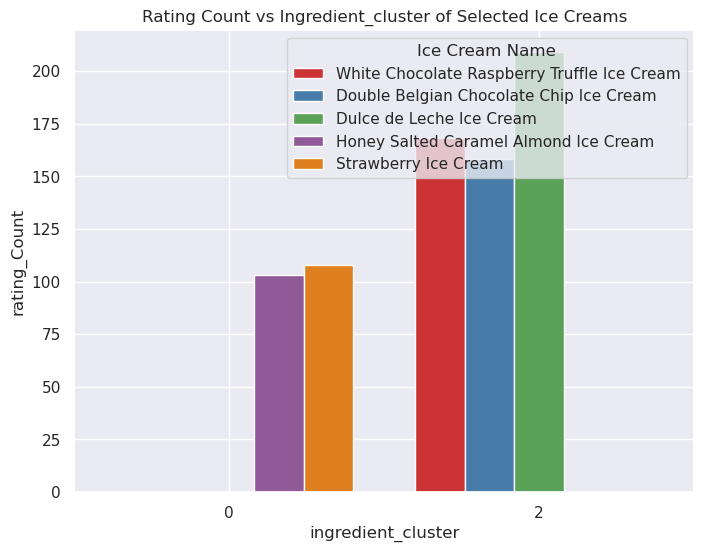

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Create a bar graph using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_rows, x='ingredient_cluster', y='rating_count', hue='icecream_name', palette='Set1')
plt.xlabel('ingredient_cluster')
plt.ylabel('rating_Count')
plt.title('Rating Count vs Ingredient_cluster of Selected Ice Creams')
plt.legend(title='Ice Cream Name', loc='upper right')
plt.grid(True)
plt.show()

### Source of Data : 
#### https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset